In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import lab_funcs as lf
import math
from scipy.optimize import fsolve

# Элементарные свойства. Редукция аргумента
## Задание
  Выполните редукцию аргумента логарифма так, чтобы всегда получать значения из интервала $[1,1+\epsilon)$, где $\epsilon$ - маленькое положительное число. Каким свойством предпочтительнее воспользоваться $\ln x^2=2\ln x$ или $\ln \frac{x}{2}=\ln x-\ln 2$? 

 ## Решение
 

1) Сначала воспользуемся свойством $\ln{x^2} = 2\ln{x}$.
Чтобы получить аргумент в интервале [1, 1 + $\epsilon$) воспользуемся тем, что $\sqrt[n]{x} \rightarrow 1$ при $n \rightarrow \infty$

2) Тогда $\ln{x^{\frac{1}{2n}}} = \frac{1}{2n} \ln{x} \Rightarrow \ln{x} = 2n \ln{x^{\frac{1}{2n}}}$ 
и при правильно выбранном $n$ аргумент
будет пробегать значения от 1 до 1 + $\epsilon$

3) Теперь рассмотрим эту задачу, используя свойство $\ln{\frac{x}{2}} = \ln{x} - \ln{2}$

\begin{equation}
  \ln{x} = \ln{\frac{x}{2^n}} + n\ln{2}
\end{equation}

4) Число обусловленности для первого и второго случая равно $\frac{1}{|y|}$

Промоделируем первый способ редукции

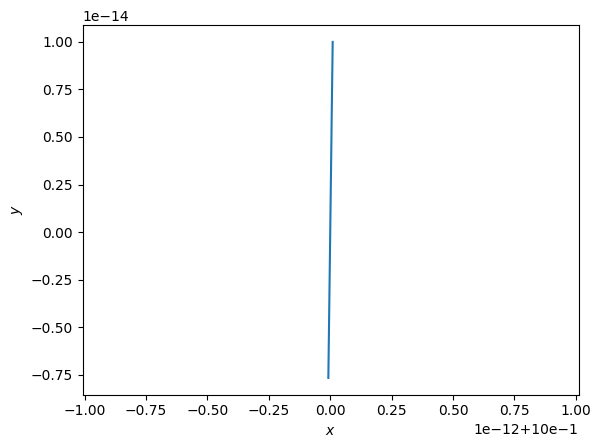

In [2]:
N = 500
x = np.linspace(0.1, 20, N)
eps=10e-15

# n for span [1 , 1 + delta]
n = math.ceil((np.log(max(x))/np.log(1+eps))/2) 

#y = np.log(np.divide(x, 2^n)) + n*np.log(2)
y = np.log(x**(1/(2*n)))
#y1 = np.log(x)

plt.plot(x**(1/(2*n)),y)
#plt.plot(x,y1)
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.legend(["Редукция", "Обычный логарифм"])
plt.show()

Второй способ:

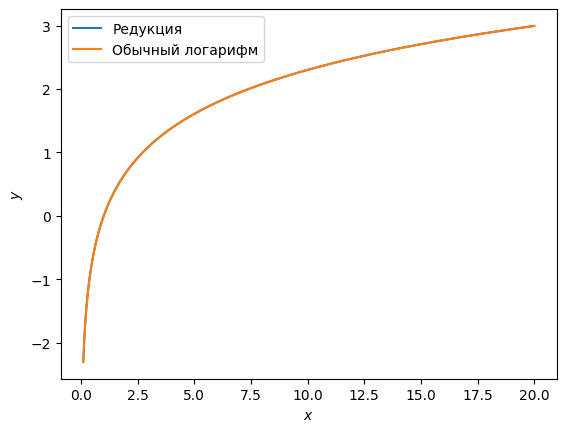

In [3]:
N = 500
x = np.linspace(0.1, 20, N)
eps=10e-15

# n for span [1 , 1 + delta]
n = math.ceil(np.log(max(x)/(1+eps))/np.log(2)) 

y = np.log(np.divide(x, 2**n)) + n*np.log(2)
y1 = np.log(x)

plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(["Редукция", "Обычный логарифм"])
plt.show()

Оценим погрешности редукций

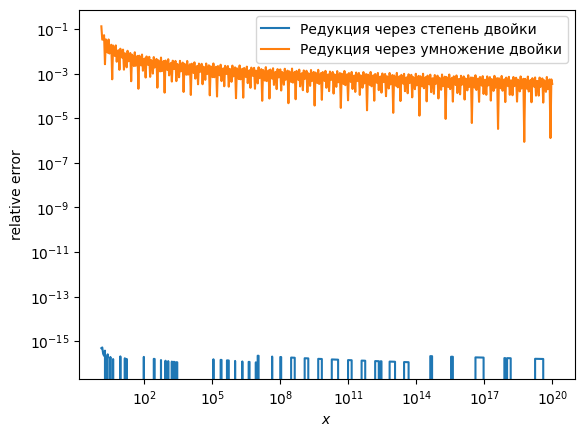

In [4]:
def red_pov(n,x):
  return np.log(np.divide(x, 2**n)) + n*np.log(2)

def red_mult(n,x):
  return (2*n)*np.log(x**(1/(2*n)))

def relative_error(x0,x):
  return np.abs(x0-x)/np.abs(x0)

def theor(n,x, eps0):
  return np.abs(np.log(x/(2**n))+n*np.log(2))*eps0


eps0=np.finfo(np.double).eps
eps=10e-15

# n for span [1 , 1 + delta]
n_pov = math.ceil(np.log(max(x)/(1+eps))/np.log(2)) 
n_mult = math.ceil((np.log(max(x))/np.log(1+eps))/2) 
N = 500
x = np.logspace(0.1, 20, N)



plt.loglog(x,relative_error(np.log(x),red_pov(n_pov,x)), label='Редукция через степень двойки')
plt.loglog(x,relative_error(np.log(x),red_mult(n_mult,x)), label='Редукция через умножение двойки')
plt.xlabel('$x$')
plt.ylabel('relative error')
plt.legend()
plt.show()

Как видим, для большей точности следует использовать редукцию через степень двойки

# Разложение в степенной ряд
## Задание
  Найдите количество слагаемых в частичной сумме, достаточное для получения значения логарифма с заданной точностью. Реализуйте вычисления логарифма через сумму с заданной точностью. Какую максимальную точность удается достичь?

 ## Решение
1) $\ln(1 + x) = x - x^2/2 + x^3/3 + ... + R_N$

Остаток ряда в форме Лагранжа:
\begin{equation}
  R_N = \frac{(x-a)^{N+1}}{(N + 1)!}f^{(N+1)}[a + \theta(x-a)] =  \frac{x^{N+1}}{(N + 1)!}\cdot\frac{1}{(1 + \theta \cdot x)^N}
\end{equation}

2) Тогда $min(R_N)$ при $\theta = 1$ при $x > 0$ и $\theta = 0$ при $x < 0$

Построим график зависимости остатка ряда от значения аргумента.

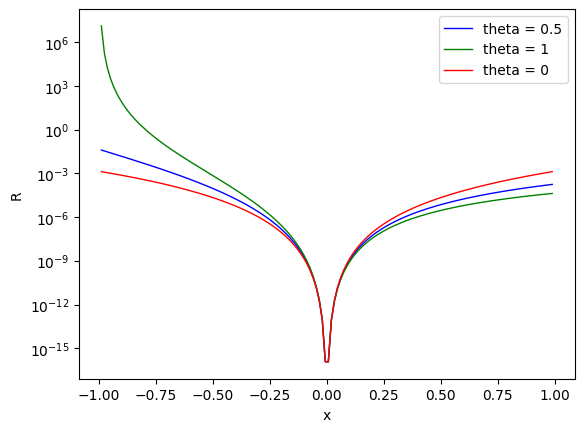

In [5]:
N = 5
theta1 = 0.5
theta2 = 1
theta3 = 0

x = np.linspace(-0.99,0.99,150)
y1 = x**(N+1)/math.factorial(N+1)/(1 + theta1*x)**N
y2 = x**(N+1)/math.factorial(N+1)/(1 + theta2*x)**N
y3 = x**(N+1)/math.factorial(N+1)/(1 + theta3*x)**N

plt.semilogy(x,y1, '-b', linewidth=1)
plt.semilogy(x,y2, '-g', linewidth=1)
plt.semilogy(x,y3, '-r', linewidth=1)
plt.ylabel("R")
plt.xlabel("x")
plt.legend(["theta = 0.5", "theta = 1", "theta = 0"])

plt.show()

Найдем количество слагаеммых в сумме, достаточное для получения логарифма при $\theta = 1$ и $x = 0.5$

In [6]:
x = 2
k = 10e-5
N1 = np.linspace(0, 99, 100)
R = []

for i in range(0, len(N1)):
  b = x**(N1[i]+1)/((math.factorial(int(N1[i])))*(1+x)**(int(N1[i])))
  R.append(b)

for i in range(0, len(R)):
  if R[i] > k and k > np.finfo(np.double).eps:
    continue
  elif k > np.finfo(np.double).eps:
    print("Количество слагаемых, достаточное для получения значения логарифма с заданной точностью:",i)
    print("Максимальная погрешность остатка ряда равна", R[i])
    break
  else:
    print("Получить точность выше машинной невозможно")
    break


Количество слагаемых, достаточное для получения значения логарифма с заданной точностью: 7
Максимальная погрешность остатка ряда равна 2.3225263280132964e-05


# Аппроксимация многочленами
## Задание
  Как следует из графика ошибки, предложенный выбор узлов $x_n$ плох. 
Подумайте, как лучше расположить узлы интерполяции? 
Воспользуйтесь формулой приведения 
$$x=\frac{1+2u/3}{1-2u/3},$$
позволяющей преобразовать интервал $x\in[1/5,5]$ в интервал $u\in[-1,1]$.
Будет ли разложение по степеням $u$ предпочтительнее разложения по степеням $a=x-1$?
Составьте интерполяционный многочлен Лагранжа от переменной $u$ с узлами в нулях многочлена Чебышева:
$$u_n=\cos\frac{\pi(n+1/2)}{N+1},\quad n=0..N.$$
Сравните точности аппроксимации с узлами в $x_n$ и в $u_n$.

**Задание A (повышенная сложность).** Найдите многочлен данной степени $N$, дающий наименьшую погрешность приближения логарифма на интервале $[1/5,5]$.

 ## Решение

Воспользуемся формулой приведения для выбора новых узлов.

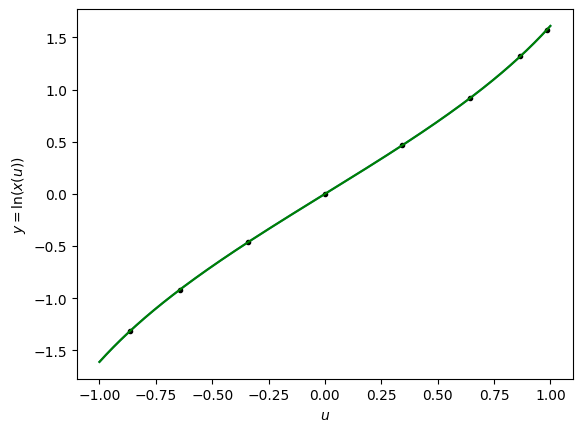

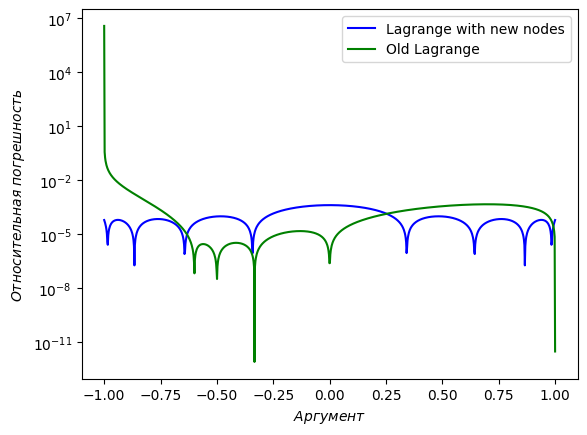

In [10]:
import scipy.interpolate

# Lagrange's interpolation
N=5
xn=1+1./(1+np.arange(N))
yn=np.log(xn)
x=np.linspace(1+1e-10,2,1000)
y=np.log(x)
L=scipy.interpolate.lagrange(xn,yn)
yl=L(x)

# New Lagranges' interpolation
N=8
un=np.cos((np.pi*(np.arange(N)+ 1/2)/(N + 1)))
yn=np.log((1 + 2*un/3)/(1 - 2*un/3))
u=np.linspace(-1,1,1000)
y_new=np.log((1 + 2*u/3)/(1 - 2*u/3))
L=scipy.interpolate.lagrange(un,yn)
yl_new=L(u)

# ploting function for new nodes
plt.plot(u,y_new)
plt.plot(un,yn,'.', color = 'black')
plt.plot(u,yl_new, color = 'green')
plt.xlabel("$u$")
plt.ylabel("$y=\ln(x(u))$")
plt.show()

# ploting relative error
plt.semilogy(u,relative_error(y_new,yl_new), '-b')
plt.semilogy(u,relative_error(y,yl), '-g')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.legend(["Lagrange with new nodes", "Old Lagrange"])
plt.show()

Доделать задание А

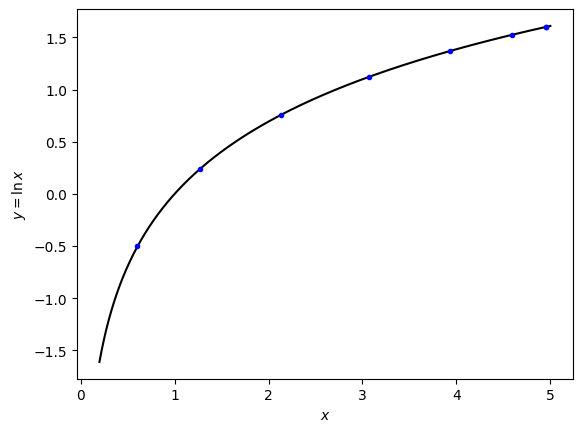

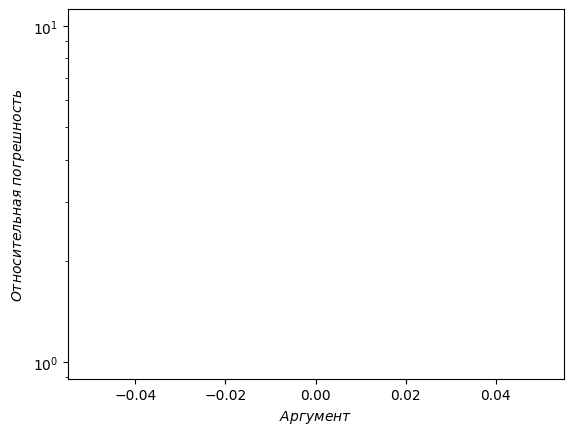

In [27]:
import scipy.interpolate

# Узлы итерполяции
a = 0.2
b = 5
N=8

x_difn = []
y_difn = []

for n in range(0,N):
  xk = (a+b)/2 + ((b-a)/2)*np.cos(np.pi*(2*n-1)/(2*N))
  x_difn.append(xk)
  yk=np.log(xk)
  y_difn.append(yk)

# Тестовые точки
a = np.array(np.linspace(1/5, 0.99, 500)).tolist()
b = np.array(np.linspace(1.01, 5, 500)).tolist()

x_dif=a+b
y_dif=np.log(x_dif)
L=scipy.interpolate.lagrange(x_difn,y_difn)
y_difl=L(x_dif)

# ploting interpolate function with nodes
plt.plot(x_dif,y_dif,'-k')
plt.plot(x_difn,y_difn,'.b')
plt.plot(x_dif,y_difl,'-r')
plt.xlabel("$x$")
plt.ylabel("$y=\ln x$")
plt.show()

# ploting relative error
plt.semilogy(x_dif,lf.relative_error(y_dif,y_difl), '-b')
plt.xlabel("$Аргумент$")
plt.ylabel("$Относительная\;погрешность$")
plt.show()

# Итерационный метод
## Задание 
Начальное приближение в вышеприведенном алгоритме выбрано очень грубо, предложите лучшее приближение. Оцените число итераций, необходимое для получения лучшей возможной точности. Реализуйте метод Ньютона для найденного числа итераций. Удалось ли получить машиную точность? Почему? Почему при использовании 1 в качестве начального приближения итерации расходятся для $x$ заметно отличающихся от 1?

## Решение
Скажем, что алгоритм работает только для положительных x. Точку начального приближение мы выбираем исходя из значения x. Если $|x| <= 2$ тогда раскладываем в ряд логарифма аргумента $1 + \alpha$, где $\alpha$ мало. Если иначе, то представим аргумент в следующем виде $x \approx (1 + \alpha)^{2^n}$. Следовательно логарифм будет в виде $\ln(x) = 2^{n}\cdot \ln(1 + \alpha)$, т.е. опять свели к первому случаю.

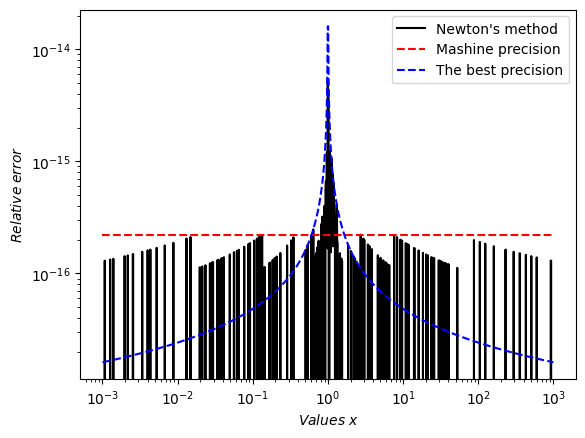

In [37]:
epsilon=np.finfo(np.double).eps

def update_log_newton(x, N=10):
  y = np.zeros(len(x))
  for i in range(0, len(x)):
    if x[i]<=2:
      y[i]=(x[i]-1)-(x[i]-1)**2/2+(x[i]-1)**3/3 # if abs(x) <= 2 then used use the expansion of the logarithm in a series with a small value in the argument
    else:
      n = 0
      k = max(x)
      while k**(1/(2**n)) > 1.99:
        n+=1

      y[i] = (2**n)*(x[i]**(1/2**n)-1 - (x[i]**(1/2**n)-1)**2/2 + (x[i]**(1/2**n)-1)**3/3) # reduce to the case of a series with the logarithm of a small argument

  for j in range(N):
    y+=-1+x/np.exp(y)
  return y



eps0=np.finfo(np.double).eps
N=10
x=np.logspace(-3,3,1000)
best_precision=(epsilon/2)*np.abs(1./np.log(x))
y0=np.log(x)
y=update_log_newton(x,N)
plt.loglog(x,relative_error(y0,y),'-k', label = 'Newton\'s method')
plt.loglog(x, np.full(x.shape, eps0), '--r', label='Mashine precision')
plt.loglog(x, best_precision, '--b', label='The best precision')
plt.xlabel("$Values\;x$")
plt.ylabel("$Relative\;error$")
plt.legend()
plt.show()



# Вычисление с помощью таблиц
## Задание 
Реализуйте метод, комбинирующий таблицы и интерполяцию многочленом (достаточно первой степени). Как зависит скорость метода от степени многочлена? Как зависит точность?

Используя любой метод, реализуйте вычисление логарифма с точностью, не более чем на порядок худшей, чем теоретически возможная.

## Решение
Реализуем алгоритм, используя таблицу и полиномы Лагранжа.

C:\Users\tor\AppData\Local\Temp\ipykernel_17060\1014542135.py:36: RuntimeWarning: divide by zero encountered in log
  yn.append(np.log(xi))


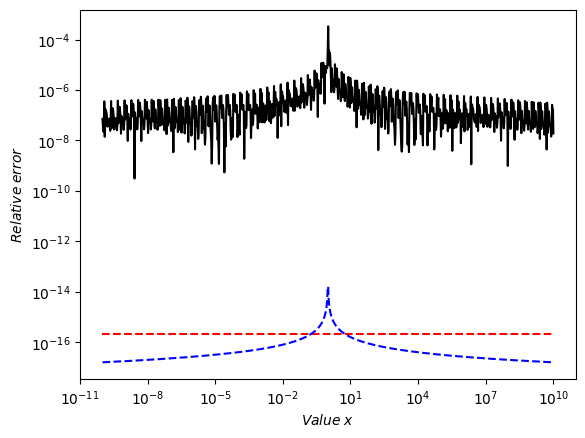

In [46]:
# solve Lagrange's polinom in t posion
def lagranz(x,y,t):
    z=0
    for j in range(len(y)):
        p1=1; p2=1
        for i in range(len(x)):
            if i==j:
                p1=p1*1; p2=p2*1
            else:
                p1=p1*(t-x[i])
                p2=p2*(x[j]-x[i])
        z=z+y[j]*p1/p2
    return z

# make array [(1/N) * i]_i
def divide_segment(N):
    segment = []
    length = 1 / N
    segment.append(0)
    for i in range(1, N):
        segment.append(i * length)
    segment.append(1)
    return segment


def log_table(x, N):
    B=8 # число используемых для составления таблицы бит мантиссы
    # N - число узлов итерполяции

    result=[]
    xn=[]
    yn=[]
    # set nodes
    for i in range(N):
      xi=np.linspace(divide_segment(N)[i], divide_segment(N)[i+1], 4)
      xn.append(xi)
      yn.append(np.log(xi))

    log2=np.log(2)
    result=[]
    M,E=np.frexp(x)
    result=[]
    for i in range(len(x)):
      for j in range(len(divide_segment(N))):
        if divide_segment(N)[j]<=M[i]<divide_segment(N)[j+1]:
          result.append(E[i]*log2+lagranz(xn[j],yn[j],M[i]))
    return result


x=np.logspace(-10,10,1000)
y0=np.log(x)
y=log_table(x, 8)
plt.loglog(x,relative_error(y0,y),'-k', label='Lagrange + table')
plt.loglog(x, np.full(x.shape, eps0), '--r', label='Mashine precision')
plt.loglog(x, best_precision, '--b', label='The best precision')
plt.xlabel("$Value\;x$")
plt.ylabel("$Relative\;error$")
plt.show()

Теперь покажем зависимость количества ошибки от количества полиномов

C:\Users\tor\AppData\Local\Temp\ipykernel_17060\3431782432.py:14: RuntimeWarning: divide by zero encountered in log
  yn.append(np.log(xi))


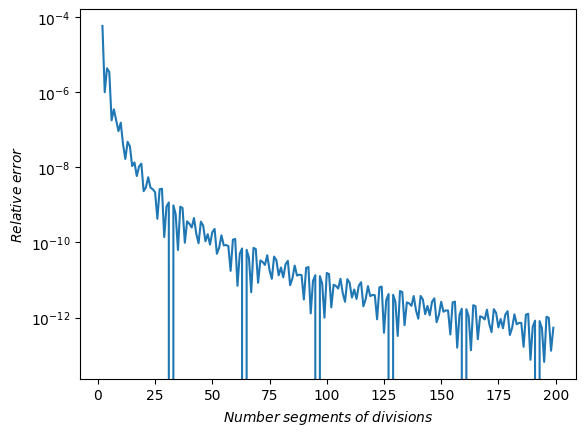

In [50]:
N_max=200
x_test=200


def log_table_one(x, N):
    B=8 # число используемых для составления таблицы бит мантиссы
    # N - число узлов итерполяции
    result=[]
    xn=[]
    yn=[]
    for i in range(N):
      xi=np.linspace(divide_segment(N)[i], divide_segment(N)[i+1], 4)
      xn.append(xi)
      yn.append(np.log(xi))
    
    log2=np.log(2)
    result=[]
    M,E=np.frexp(x)
    result=[]
    for j in range(len(divide_segment(N))):
      if divide_segment(N)[j]<=M<divide_segment(N)[j+1]:
        result=(E*log2+lagranz(xn[j],yn[j],M))
    return result

Method_Error=[]
N_arr=[i for i in range(2,N_max)]
for i in N_arr:
  Method_Error.append(relative_error(np.log(x_test), log_table_one(x_test, i)))


plt.semilogy(N_arr, Method_Error)
plt.xlabel("$Number\;segments\;of\;divisions$")
plt.ylabel("$Relative\;error$")
plt.show()